In [1]:
import pandas as pd
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

pca_target = ['motor_current','motor_rpm','motor_temp','motor_vibe']
pca.fit(train.loc[:,pca_target])
pca.explained_variance_ratio_

array([0.99975073])

In [7]:
train_motor_pca = train.drop(pca_target,axis=1)
train_motor_pca['motor'] = pca.transform(train.loc[:,pca_target])
train_motor_pca = train_motor_pca.drop('out_pressure',axis=1)

In [8]:
train_motor_pca

,air_inflow,air_end_temp,type,motor
0,1.59,41.00,0,-692.646469
1,2.97,59.28,0,769.553153
2,1.91,45.29,0,-349.599545
3,2.37,51.33,0,133.466299
4,1.90,45.21,0,-355.600482
...,...,...,...,...
2458,2.28,50.20,7,43.454009
2459,2.04,46.94,7,-217.581631
2460,1.19,35.74,7,-1113.703916
2461,1.21,36.00,7,-1092.701168


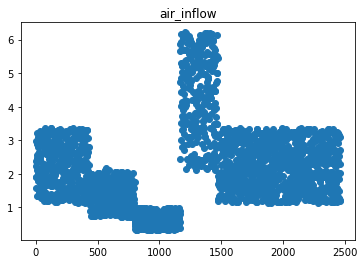

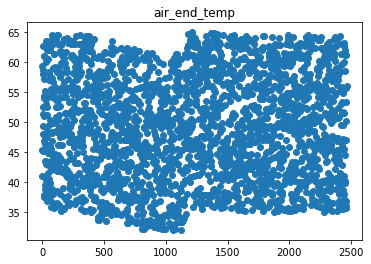

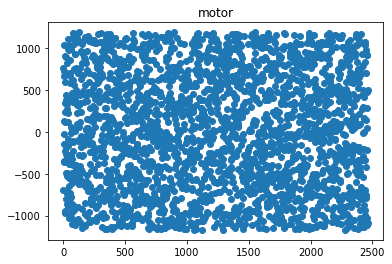

In [10]:
plot_target = ['air_inflow','air_end_temp','motor']
import matplotlib.pyplot as plt
for i in plot_target:
    plt.title(i)
    plt.scatter(range(len(train)),train_motor_pca[i])
    plt.show()